<font size="10"><b>Проведение базового EDA: исследование игрового рынка (1980-2016 гг.)</b></font>

**Описание данных games.csv** (по столбцам):

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (от 0 до 100)

User_Score — оценка пользователей (от 0 до 10)


Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

**Базовый EDA:**
Интересно будет узнать следующее:
1. Исследовать игровой рынок
2. Найти популярные продукты
3. Выявить определяющие успешность игры закономерности
5. Сделать прогноз на 2017 год
6. Проверить гипотезы

**План Анализа:**
1. подготовка данных
2. исследовательский анализ данных
3. портрет пользователя каждого региона
4. исследование статистических показателей
5. проверка гипотез
6. общий вывод

**шаг 1-2 общая информация**

In [ ]:
import pandas as pd
df = pd.read_csv('/datasets/games.csv')
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
df.columns
#display(df.loc[df['Name'] == ' '])

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Вывод:
Пропуски: в name и genre по 2 пропуска, это 2 строки. Эти пропуски случайны. 269 пропусков из ~17000 в годах выпуска. Скорее всего не случайны, не полные данные по играм, либо другие ошибки. Это небольшая потеря, не думаю, что связано с плохой выгрузкой данных. В Critic_Score, User_Score, Rating пропущено от 6000 до 8000 из ~17000. Достаточно много, могут быть проблемы с выгрузкой данных. С другой стороны User_Score (10014) ~= Rating (9949), потому проблема может быть не в выгрузке, а в непопулярности конкретных 6-8 тыс. игр, но маловероятно, т. к. это половина данных. Стоит проверить еще раз нет ли проблем при выгрузке данных.

**Шаг 3. Подготовка данных** <a id='link1'></a>

Замена названий столбцов

In [ ]:
columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.rename({"Name": "name", "Platform": "platform", "Year_of_Release": "year_of_release", "Genre": "genre",
           "NA_sales": "na_sales", "EU_sales": "eu_sales",
       "JP_sales": "jp_sales", "Other_sales": "other_sales", "Critic_Score": "critic_score", "User_Score": "user_score",
           "Rating": "rating"}, axis='columns', inplace=True)
#df.rename(str.lower, axis='columns')
display(df.columns)
df.info()
display(df)
df.isnull().sum()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Вывод:

Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему
*) заменяем данные на 'unknown', 
1. пропущено 2 names, заменим на 'unknown'; там же пропущен и жанр.
2. пропущено 2 genre, заменим на 'unknown'
3. 269 пропущеных year_of_release, где получится возьмем из name (заметил, в конце name иногда пишется год); остальные заменим (временно на 1970-й год) удалим; переведем год из float64 в int
4. пропуски critic_score и user_score заменим на средние значения (в данном случае лучше медианы), т. к. пропущено около половины, переведем в float64, легче будет считать
5. пропуски в rating заменим на '' 
6. аббревиатуру 'tbd' в столбцах с рейтингом, это игры с небольшим количеством продаж, заменим на среднее
7. полных дубликатов не обнаружено

In [ ]:
import requests
import re

df.info()
df[df['name'].isnull()]
df['name'] = df['name'].fillna('unknown')

df['genre'] = df['genre'].fillna('unknown')

df['rating'] = df['rating'].fillna('')

display(df[df['user_score'] == 'tbd'])
df['user_score'] = df['user_score'].replace('tbd', 'NaN')
display(df[df['user_score'] == 'tbd'])
#df['user_score'].where('tbd', 'new', inplace=True)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
user_score_avg = df['user_score'].mean()

year_of_release_min = df['year_of_release'].min()
year_of_release_max = df['year_of_release'].max()

#df[df['year_of_release'].isnull()].head(20)


df['year_of_release'].fillna(value=0, inplace=True)
df = df.query('year_of_release != "Nan"')
df.info()
###df = df.dropna().reset_index(drop=True)
df['year_of_release'] = df['year_of_release'].astype('int')

df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.info()
df.tail(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 no

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.0,67.0,NaN,E,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.0,53.0,NaN,E,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.0,48.0,NaN,E,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,,0.01
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.0,NaN,NaN,,0.01
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.0,NaN,NaN,E,0.01


In [ ]:

df.duplicated().sum()
#df

0

**Шаг 4. Проводим исследовательский анализ данных** <a id='link2'></a>

##Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Данные до 1993 года можно отбросить (их количество мало), но лучше сохранить, например, для построения графиков изменений величин по годам. 2016 год тоже можно отбросить, т. к. данные могут быть не полные. Данные собраны в середине 2016го.

In [ ]:

count_by_years = df.groupby(by=["year_of_release"])['critic_score'].count()
df_grby_year = df.groupby(by=["year_of_release"]).sum()
df_grby_year['critic_score'] = df_grby_year['critic_score']/count_by_years
df_grby_year['user_score'] = df_grby_year['user_score']/count_by_years
df_grby_year['count_of_games'] = count_by_years

df_grby_year # !! вся таблица
df_grby_year_ans_4_1 = df_grby_year[['total_sales', 'count_of_games']]
df_grby_year_ans_4_1.reset_index(inplace=True)
df_grby_year_ans_4_1

,year_of_release,total_sales,count_of_games
0,0,98.92,154
1,1980,11.38,0
2,1981,35.68,0
3,1982,28.88,0
4,1983,16.80,0
5,1984,50.35,0
6,1985,53.95,1
7,1986,37.08,0
8,1987,21.70,0
9,1988,47.21,1


Исследование:
Популярность платформ PS2, X360, PS3, Wii, DS, PS, PSP, XB, NES, GBA, GB, N64, SNES, GC на нуле, ввиду вытеснения другими конкурентными платформами, устаревания железа или изьятия из производства. Появляются новые и исчезают старые платформы в среднем за промежуток в 10 лет.

Возьмем данные с 2000 по 2015 (т. к. за 2016 год данные не полные, до 2006 продажи незначительные, их можно не учитывать). Отбросим остальные года.

In [ ]:
df_grby_platform = df.groupby(by=["platform"])[['year_of_release', 'platform', 'na_sales', 'eu_sales',
      'jp_sales', 'other_sales', 'total_sales']].sum()
df_grby_platform.sort_values('total_sales', ascending=False, inplace=True)
df_grby_platform.reset_index(inplace=True)
display(df_grby_platform) # !! вся таблица

,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,PS2,4263750,583.84,339.29,139.20,193.44,1255.77
1,X360,2476173,602.47,270.76,12.43,85.76,971.42
2,PS3,2626158,393.49,330.29,80.19,135.68,939.65
3,Wii,2583531,496.90,262.21,69.33,79.07,907.51
4,DS,4259361,382.40,188.89,175.57,59.26,806.12
5,PS,2377627,336.52,213.61,139.82,40.91,730.86
6,GBA,1624604,187.54,75.25,47.33,7.73,317.85
7,PS4,789937,108.74,141.09,15.96,48.35,314.14
8,PSP,2396417,109.17,66.68,76.78,41.42,294.05
9,PC,1922531,94.53,142.44,0.17,22.38,259.52


'\nsample = df.query(\'platform == "PS2"\')\nsample.plot(\n    x=\'year_of_release\',\n    y=\'total_sales\',\n    ylim=(0, 100),\n    style=\'o\',\n    grid=True,\n    figsize=(12, 6),\n) \n(\n    df.query(\'platform == "PS2"\')\n    .pivot_table(index=\'year_of_release\', values=\'total_sales\', aggfunc=\'sum\')\n    .plot(grid=True, figsize=(12, 5))\n)\n'

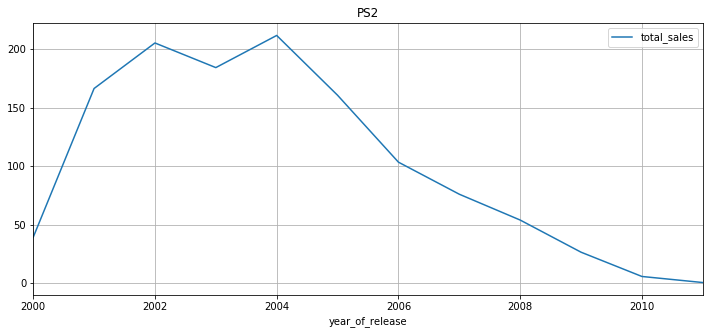

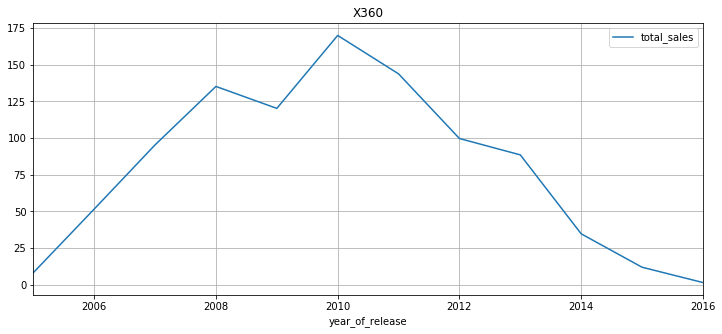

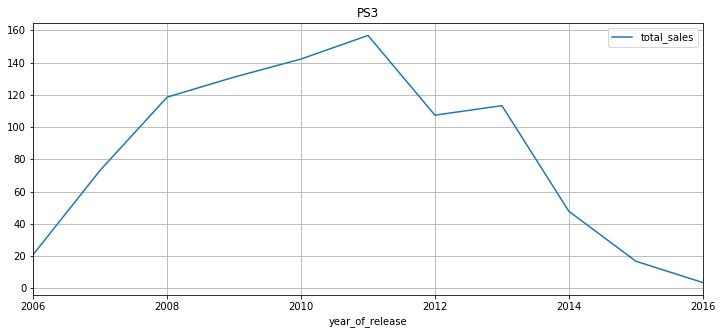

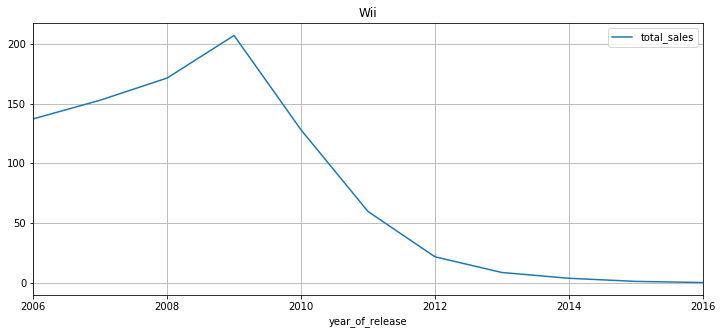

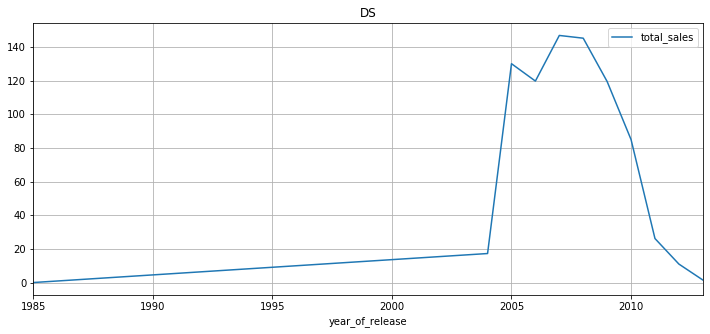

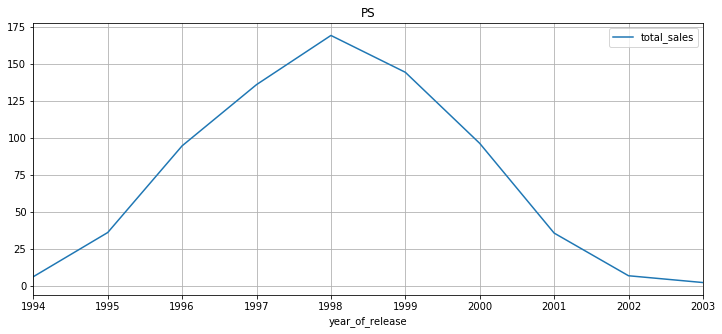

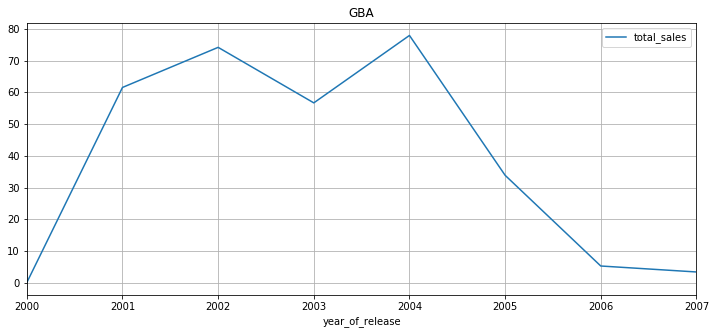

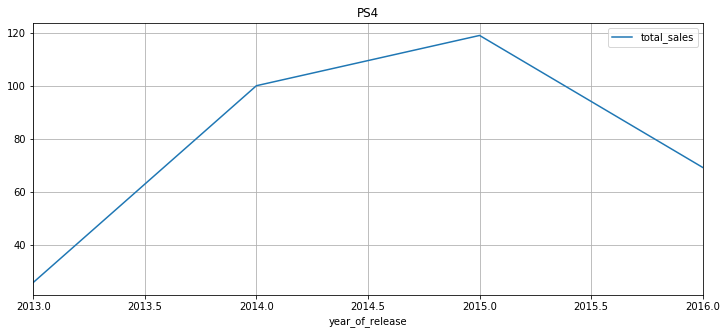

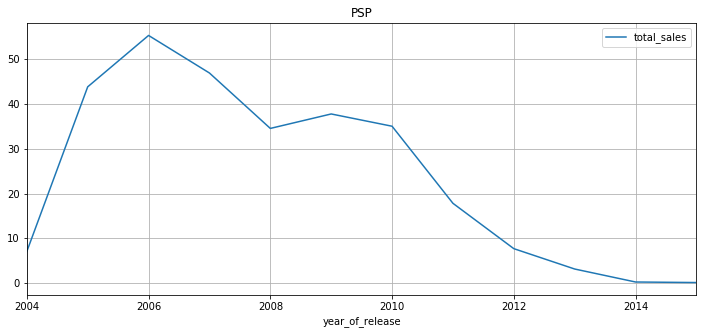

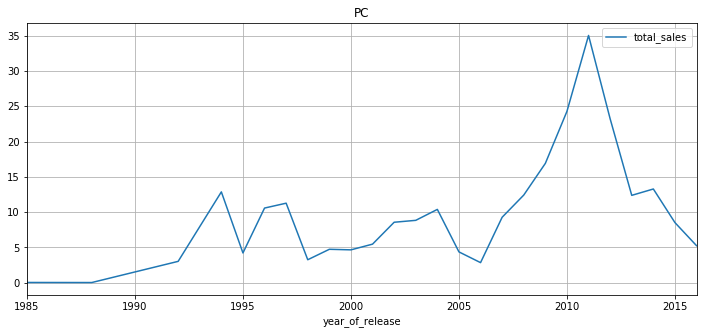

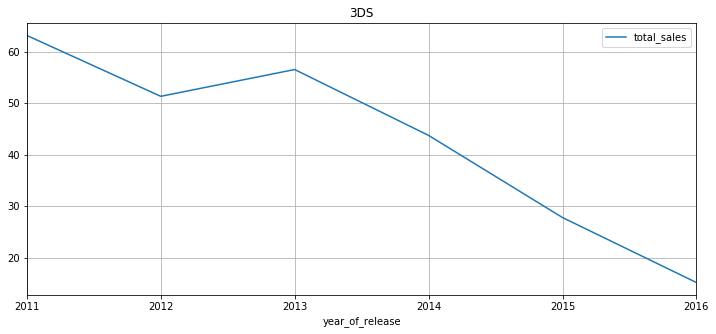

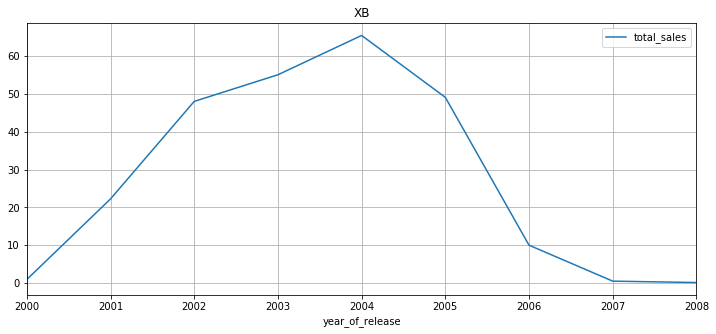

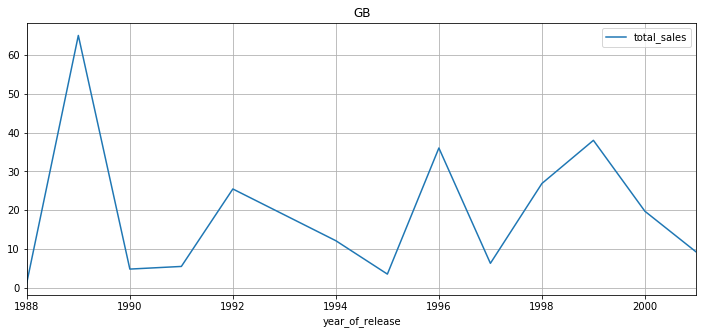

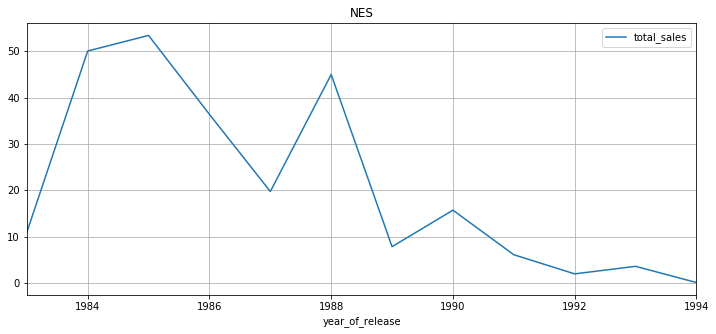

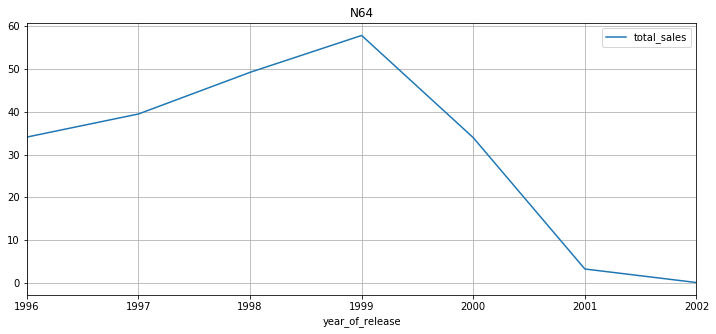

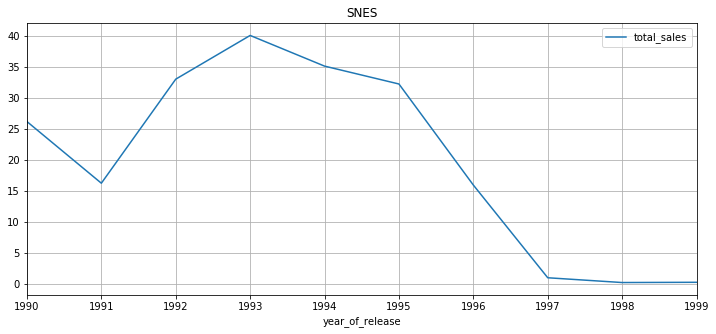

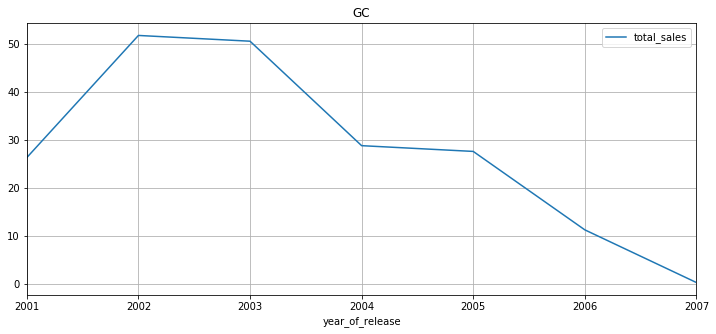

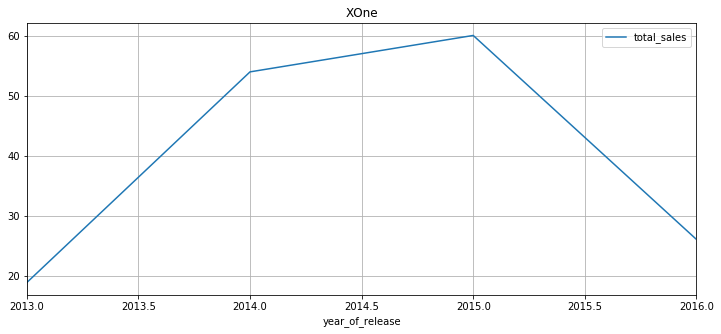

In [ ]:
###df_year_0 = df.query('year_of_release != "Nan"')
zer0 = 0
total_sales_min = 100.0 # то, что ниже не выводим
#df1 = df.merge(df_grby_platform, on='platform', how='left')

for elem in df_grby_platform['platform'].unique():
    if ((int(df_grby_platform.query('platform == @elem')['total_sales'])) > total_sales_min):
        (
        df.query('(platform == @elem) & (year_of_release != @zer0)')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(grid=True, figsize=(12, 5), title=elem)
        )

In [ ]:
df_cut = df.query('2009 < year_of_release < 2016')
df_cut.reset_index(drop=True, inplace=True)

df_grby_platform = df_cut.groupby(by=["platform"])[['year_of_release', 'platform', 'na_sales', 'eu_sales',
      'jp_sales', 'other_sales', 'total_sales']].sum()
df_grby_platform.sort_values('total_sales', ascending=False, inplace=True)
df_grby_platform.reset_index(inplace=True)

df_cut

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
4770,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
4771,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
4772,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T,0.01
4773,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01


Исследование:
Потенциально прибыльная платформы - PS4, PC, XOne, 3DS. На остальных графиках спад популярности.

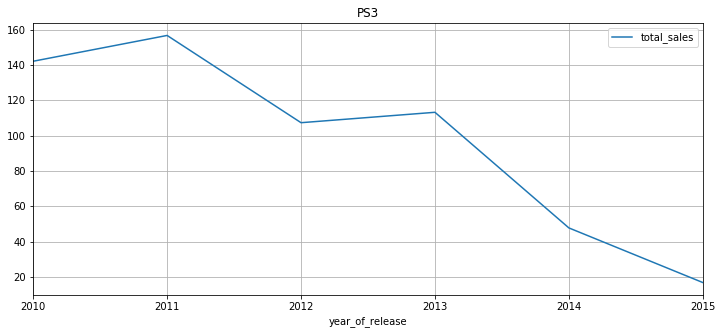

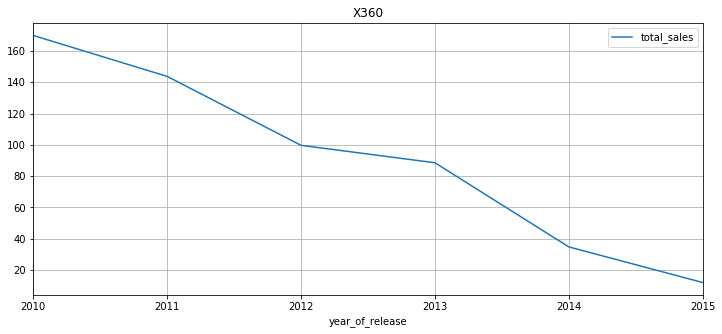

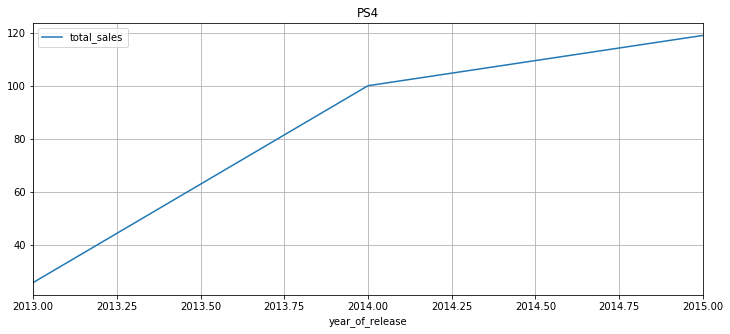

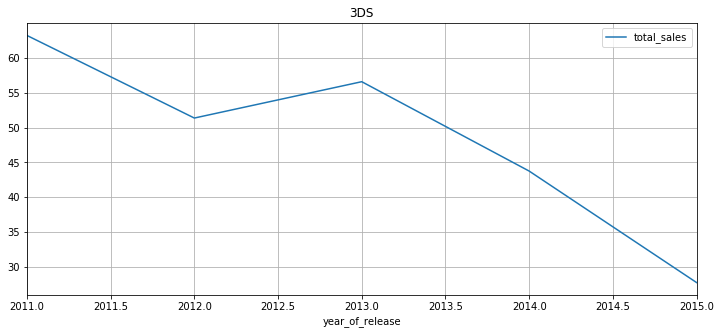

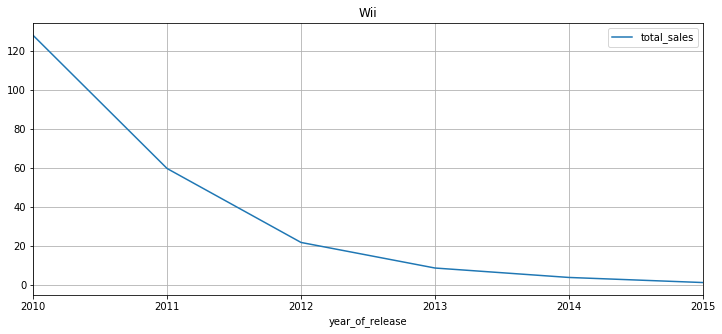

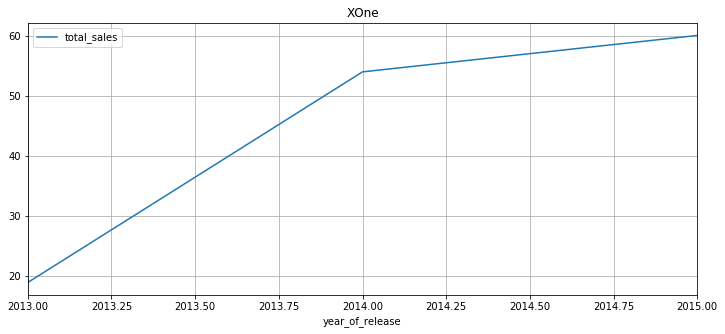

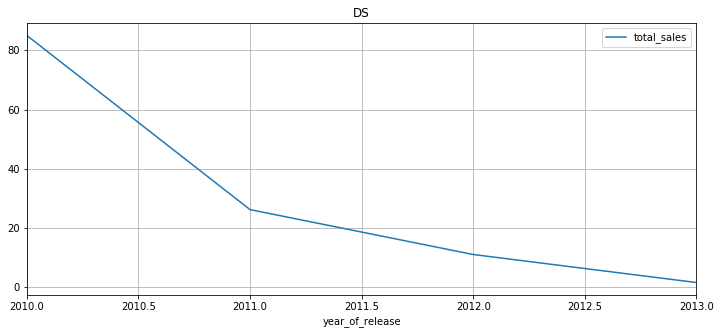

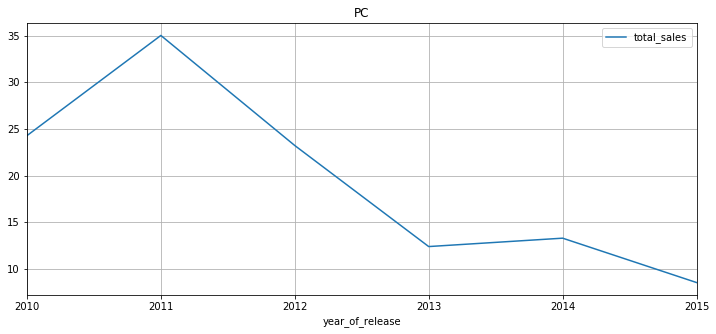

In [ ]:
for elem in df_grby_platform['platform'].unique():
    if ((int(df_grby_platform.query('platform == @elem')['total_sales'])) > total_sales_min):
        (
        df_cut.query('platform == @elem')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(grid=True, figsize=(12, 5), title=elem)
        )

Исследование:
При выпуске игры на PC и PS4 основная доля приходится на PS4. Потенциально прибыльные платформы - PS4, PC. Аудитория PS4 много больше рынка PC. PS4 лидирует по средним продажам за одну игру, PC значительно отстает. В PS4 стоит вкладываться. 

,total_sales
name,
2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe,0.11
2010 FIFA World Cup South Africa,0.85
2014 FIFA World Cup Brazil,0.43
Ace Combat: Assault Horizon,0.49
Adrenalin Misfits,0.15
...,...
[Prototype 2],0.79
de Blob 2,0.15
nail'd,0.11


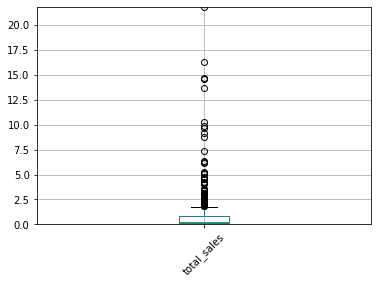

,total_sales
name,
Tales of Xillia 2,0.84
.hack: Sekai no Mukou ni + Versus,0.03
2010 FIFA World Cup South Africa,1.23
2014 FIFA World Cup Brazil,0.61
3rd Super Robot Wars Z Jigoku Hen,0.23
...,...
[Prototype 2],0.74
de Blob 2,0.21
inFAMOUS 2,1.82


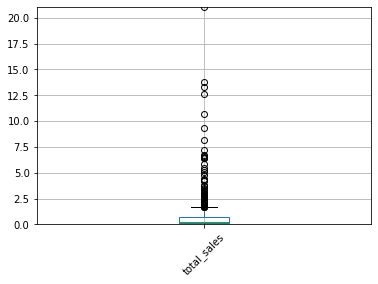

,total_sales
name,
Frozen: Olaf's Quest,0.51
100 Classic Games,0.03
1000 Cooking Recipes from ELLE à table,0.02
1001 Touch Games,0.31
101-in-1 Sports Megamix,0.09
...,...
Zoobles! Spring to Life!,0.13
de Blob 2,0.11
iCarly 2: iJoin The Click!,0.27


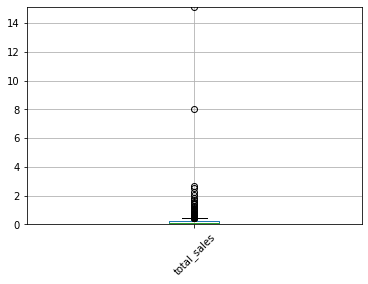

,total_sales
name,
Adventure Time: Finn & Jake Investigations,0.10
Akiba's Trip: Undead & Undressed,0.11
Alien: Isolation,1.12
Angry Birds Star Wars,0.22
Arcania: Gothic 4,0.05
...,...
Yakuza Zero: The Place of Oath,0.17
Yakuza: Ishin,0.15
Yoru no Nai Kuni,0.08


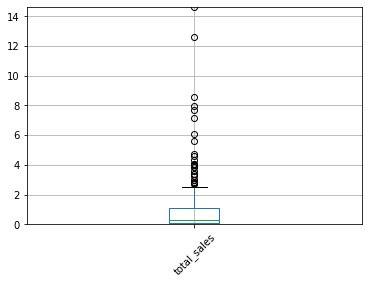

,total_sales
name,
Fire Emblem Fates,1.67
Frozen: Olaf's Quest,0.59
12-Sai. Honto no Kimochi,0.07
50 Classic Games,0.01
7th Dragon III Code: VFD,0.16
...,...
Yumi's Odd Odyssey,0.03
Yuugen Gaisha Brave Company,0.06
Zero Escape: Virtue's Last Reward,0.03


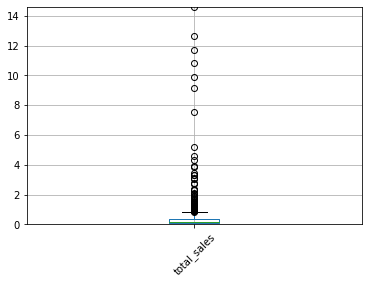

,total_sales
name,
10 Minute Solution,0.08
101-in-1 Sports Party Megamix,0.02
2010 FIFA World Cup South Africa,0.43
ABBA: You Can Dance,0.77
Active Life Explorer,0.14
...,...
iCarly 2: iJoin The Click!,0.10
pro evolution soccer 2011,0.22
thinkSMART FAMILY!,0.03


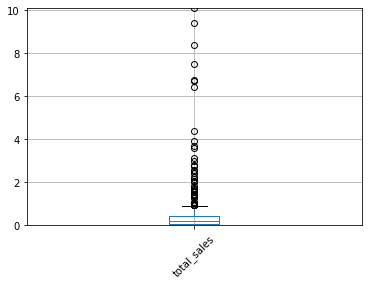

,total_sales
name,
Adventure Time: Finn & Jake Investigations,0.05
Alien: Isolation,0.50
Angry Birds Star Wars,0.17
Assassin's Creed IV: Black Flag,2.24
Assassin's Creed Syndicate,1.29
...,...
Wolfenstein: The New Order,0.68
Wolfenstein: The Old Blood,0.15
Zombie Army Trilogy,0.11


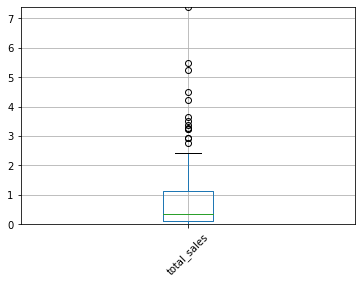

,total_sales
name,
Adventure Time: Explore the Dungeon Because I Don't Know!,0.03
Adventure Time: Finn & Jake Investigations,0.05
Angry Birds Star Wars,0.10
Animal Crossing: Amiibo Festival,0.42
Art Academy: Home Studio,0.01
...,...
Xenoblade Chronicles X,0.84
YoKai Watch Dance: Just Dance Special Version,0.03
Yoshi's Woolly World,1.30


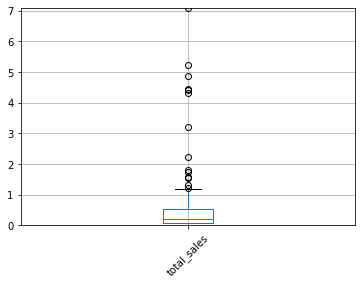

,total_sales
name,
18 Wheels of Steel: Extreme Trucker 2,0.11
4 Play Collection - Dark Mysteries,0.01
7 Roses: A Darkness Rises,0.02
A Game of Thrones: Genesis,0.04
A New Beginning,0.06
...,...
X-Plane 10 Global,0.02
X3: Terran War Pack,0.02
XCOM: Enemy Unknown,0.71


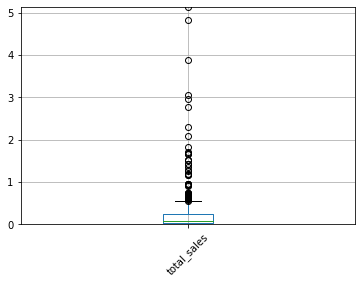

,total_sales
name,
.hack//Link,0.14
1/2 Summer +,0.01
11eyes: CrossOver,0.02
2010 FIFA World Cup South Africa,0.46
7th Dragon 2020,0.20
...,...
Yu-Gi-Oh! 5D's Tag Force 6,0.16
Yuusha no Kuse ni Namaikida Or 3D,0.11
Zetta Hero Project: Unlosing Ranger vs. Darkdeath Evilman,0.14


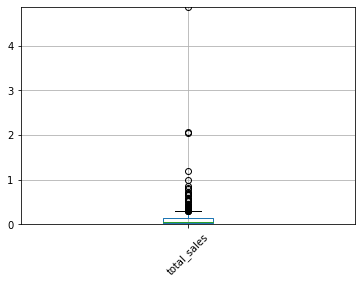

,total_sales
name,
3rd Super Robot Wars Z Jigoku Hen,0.19
3rd Super Robot Wars Z: Tengoku-Hen,0.19
A Good Librarian Like a Good Shepherd: Library Party,0.03
AKB1/149: Love Election,0.07
AMNESIA World,0.03
...,...
Yomawari,0.11
Yoru no Nai Kuni,0.08
Ys: Memories of Celceta,0.25


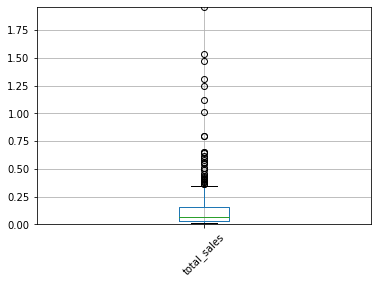

,total_sales
name,
Ben 10 Ultimate Alien: Cosmic Destruction,0.23
Cabela's North American Adventures,0.08
Clover no Kuni no Alice: Wonderful Wonder World,0.02
Despicable Me: The Game,0.10
Dora's Big Birthday Adventure,0.03
FIFA 12,0.08
FIFA Soccer 11,0.76
Hakuouki: Reimeiroku,0.05
Hana to Otome ni Shukufuku o: Harekaze no Okurimono,0.02


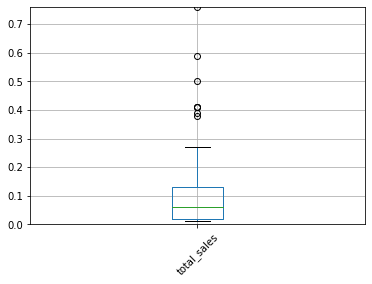

"(\n    df_cut_platform.pivot_table(index='name', values='total_sales')\n    .plot(grid=True, rot=90, fontsize=12, figsize=(15,15))\n) "

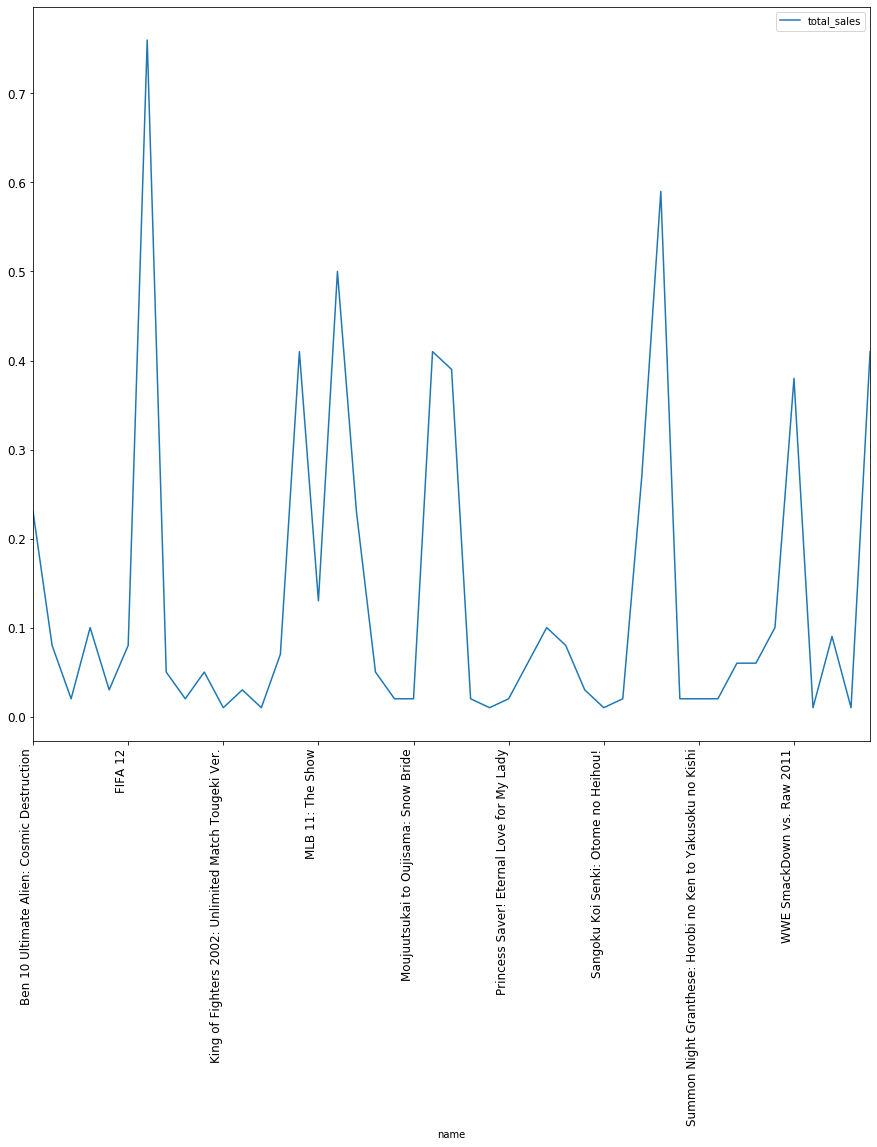

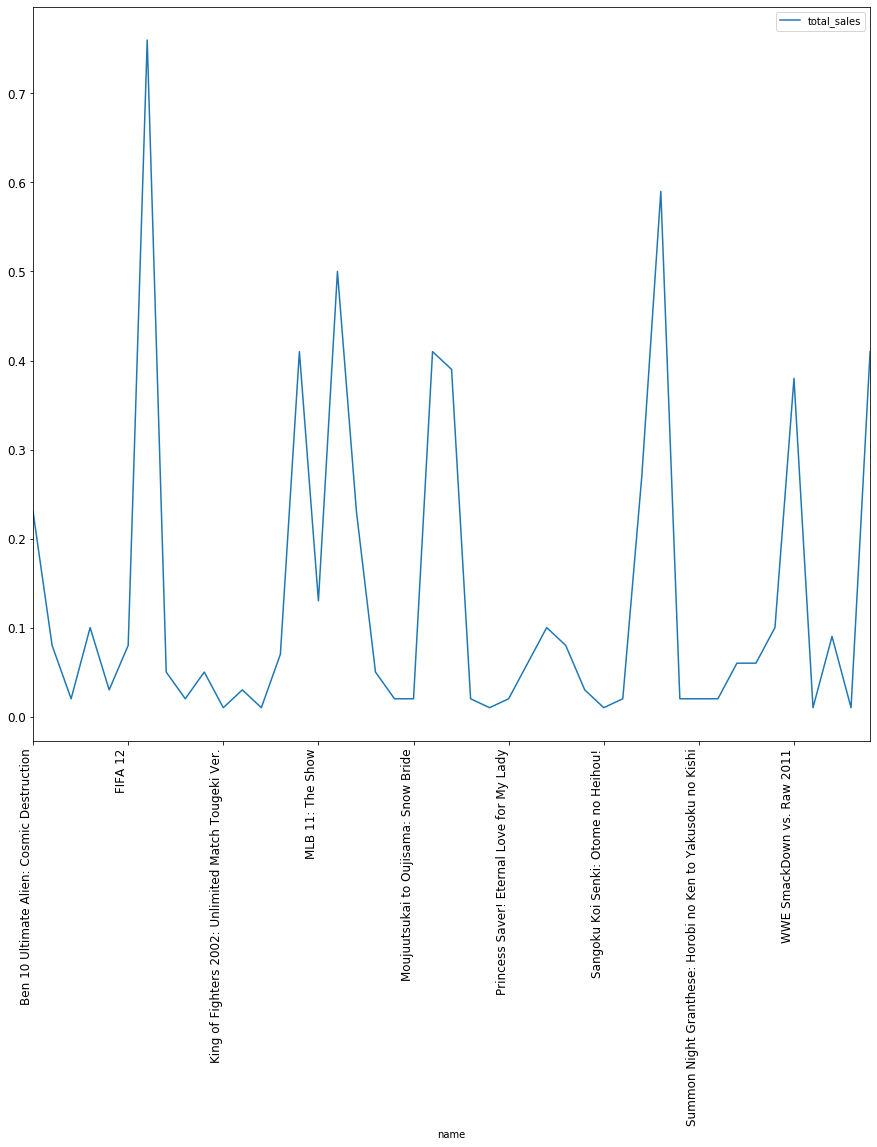

In [ ]:
import matplotlib.pyplot as plt

for elem in df_cut['platform'].unique():
    df_cut1 = df_cut.query('platform == @elem')
    df_cut_platform = df_cut1.groupby(['name'])[['name', 'platform', 'total_sales']].sum()
    sales_max = df_cut_platform['total_sales'].max()
    plt.ylim(0, sales_max)
    display(df_cut_platform)
    df_cut_platform.boxplot(rot=45, figsize=(15,15))
    plt.show()

df_cut_platform.plot( subplots=True, rot=90, fontsize=12, figsize=(15,15))


df_cut_platform1 = df_cut_platform.reset_index()
df_cut_platform1.plot(x='name', subplots=True, rot=90, fontsize=12, figsize=(15,15))

In [ ]:
count_by_platform = df_cut.groupby(by=["platform"])['name'].count()
df_grby_platform = df_cut.groupby(by=["platform"]).sum()
df_grby_platform['avg_total_sales_by_game'] = df_grby_platform['total_sales']/count_by_platform
#df_grby_platform['avg_total_sales_by_game1'] = df_grby_platform['total_sales'].mean()
df_grby_platform.sort_values(by='avg_total_sales_by_game', ascending=False)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,avg_total_sales_by_game
platform,,,,,,,,,
PS4,459313,87.25,109.31,10.22,38.11,11143.0,1040.0,244.89,1.074079
XOne,322301,78.85,41.96,0.33,12.03,7962.0,751.4,133.17,0.832312
X360,1341740,333.49,162.70,5.46,47.24,29607.0,3151.8,548.89,0.822924
PS3,1712196,228.58,212.34,57.96,85.26,33326.0,3537.9,584.14,0.686416
WiiU,267784,36.00,23.65,12.34,5.60,5712.0,625.0,77.59,0.583383
3DS,937985,78.51,58.94,92.59,12.63,10429.0,1083.3,242.67,0.520751
Wii,902775,121.14,65.80,17.75,18.10,8264.0,836.2,222.79,0.496192
PC,855063,37.71,65.29,0.00,13.71,22684.0,2154.4,116.71,0.274612
DS,1019293,59.66,28.06,27.90,8.13,5102.0,345.0,123.75,0.244083


Исследование:
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы и соотнесем их с продажами игр на других платформах.

Результат: Возьмем популярную платформу - PS4. Продажи значительно сильнее зависят от отзывов критиков, чем от отзывов пользователей. Посмотрим на другие популярные платформы. На других популярных платформах сохраняется такая же тенденция доминации отзывов критиков

,critic_score,user_score,total_sales
critic_score,1.000000,0.612451,0.431848
user_score,0.612451,1.000000,0.024231
total_sales,0.431848,0.024231,1.000000


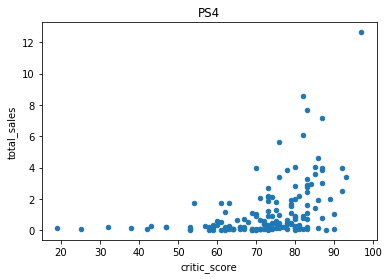

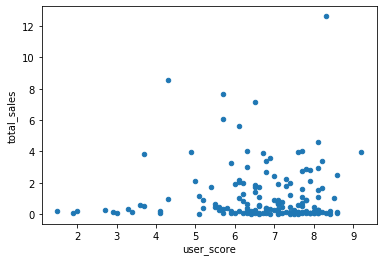

In [ ]:
platform_PS4 = df_cut.query('platform == "PS4"')
platform_PS4_temp = platform_PS4.loc[:, 'critic_score' : 'user_score']
platform_PS4_temp['total_sales'] = platform_PS4['total_sales']
display(platform_PS4_temp.corr())

platform_PS4_temp.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4') 
platform_PS4_temp.plot(x='user_score', y='total_sales', kind='scatter') 

,critic_score,user_score,total_sales
critic_score,1.000000,0.597552,0.340064
user_score,0.597552,1.000000,0.059762
total_sales,0.340064,0.059762,1.000000


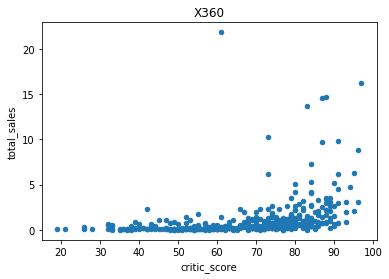

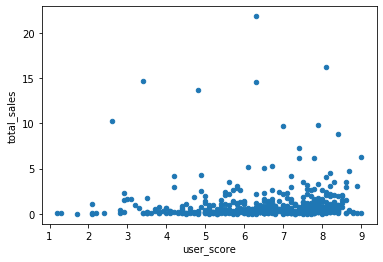

In [ ]:
platform_PS4 = df_cut.query('platform == "X360"')
platform_PS4_temp = platform_PS4.loc[:, 'critic_score' : 'user_score']
platform_PS4_temp['total_sales'] = platform_PS4['total_sales']
display(platform_PS4_temp.corr())

platform_PS4_temp.plot(x='critic_score', y='total_sales', kind='scatter', title='X360') 
platform_PS4_temp.plot(x='user_score', y='total_sales', kind='scatter') 

,critic_score,user_score,total_sales
critic_score,1.000000,0.484341,0.363696
user_score,0.484341,1.000000,-0.023173
total_sales,0.363696,-0.023173,1.000000


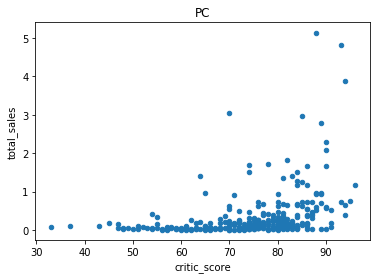

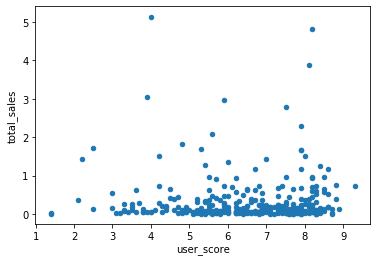

In [ ]:
platform_PS4 = df_cut.query('platform == "PC"')
platform_PS4_temp = platform_PS4.loc[:, 'critic_score' : 'user_score']
platform_PS4_temp['total_sales'] = platform_PS4['total_sales']
display(platform_PS4_temp.corr())

platform_PS4_temp.plot(x='critic_score', y='total_sales', kind='scatter', title='PC') 
platform_PS4_temp.plot(x='user_score', y='total_sales', kind='scatter') 

,critic_score,user_score,total_sales
critic_score,1.000000,0.499502,0.459385
user_score,0.499502,1.000000,-0.039268
total_sales,0.459385,-0.039268,1.000000


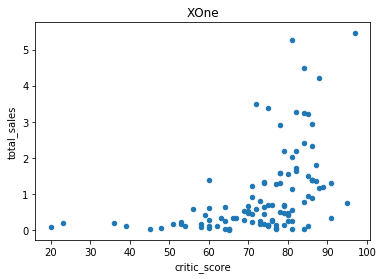

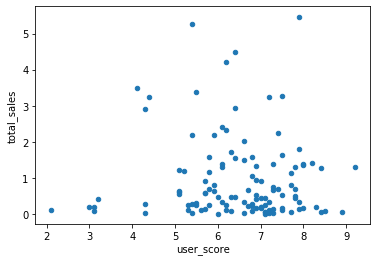

In [ ]:
platform_PS4 = df_cut.query('platform == "XOne"')
platform_PS4_temp = platform_PS4.loc[:, 'critic_score' : 'user_score']
platform_PS4_temp['total_sales'] = platform_PS4['total_sales']
display(platform_PS4_temp.corr())

platform_PS4_temp.plot(x='critic_score', y='total_sales', kind='scatter', title='XOne') 
platform_PS4_temp.plot(x='user_score', y='total_sales', kind='scatter') 

1. Исследование: Посмотрим на общее распределение игр по жанрам. Посмотрим на жанры с высокими и низкими продажами.
2. Результат: Самые прибыльные: Shooter и Platform (при рассчете общего числа продаж на 1 игру). Жанры с высокими и низкими продажами выделяются, во-первых, это мыссовые игры, во-вторых, суммарная выручка этих жанров посередине (это жанры не самых часто создаваемых игр). Жанры с низкими продажами Puzzle, Strategy, Adventure, рассчитаны больше на получение удовольствия более сложным путем, нишевые жанры.

In [ ]:
display(df_cut['genre'].unique()) # unknown обрезалось промежутком времени

df_grby_genre = df_cut.groupby(by=["genre"])[['na_sales', 'eu_sales',
      'jp_sales', 'other_sales', 'total_sales']].sum()

count_by_genre = df_cut.groupby(by=["genre"])['name'].count()
df_grby_genre['count_games'] = count_by_genre
df_grby_genre['avg_total_sales_by_game'] = df_grby_genre['total_sales']/count_by_genre
df_grby_genre.sort_values(by='avg_total_sales_by_game', ascending=False)

df_grby_genre.sort_values('total_sales', ascending=False, inplace=True)
df_grby_genre.reset_index(inplace=True)
display(df_grby_genre) # !! вся таблица

array(['Misc', 'Action', 'Role-Playing', 'Shooter', 'Racing', 'Platform',
       'Simulation', 'Sports', 'Fighting', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,count_games,avg_total_sales_by_game
0,Action,281.35,222.95,65.13,73.55,642.98,1317,0.488216
1,Shooter,221.23,155.55,12.98,51.76,441.52,363,1.216309
2,Sports,149.27,104.83,14.59,36.21,304.90,527,0.578558
3,Role-Playing,106.16,71.20,96.93,22.81,297.10,514,0.578016
4,Misc,123.04,65.43,23.25,20.24,231.96,544,0.426397
5,Racing,45.38,52.98,6.67,14.86,119.89,213,0.562864
6,Platform,53.61,36.91,15.70,10.27,116.49,138,0.844130
7,Fighting,37.21,18.99,13.15,7.77,77.12,183,0.421421
8,Simulation,26.23,25.12,12.97,5.54,69.86,199,0.351055
9,Adventure,19.89,17.56,14.49,5.24,57.18,507,0.112781


In [ ]:
display(df_grby_genre.sort_values('avg_total_sales_by_game', ascending=False).reset_index(drop=True))

,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,count_games,avg_total_sales_by_game
0,Shooter,221.23,155.55,12.98,51.76,441.52,363,1.216309
1,Platform,53.61,36.91,15.70,10.27,116.49,138,0.844130
2,Sports,149.27,104.83,14.59,36.21,304.90,527,0.578558
3,Role-Playing,106.16,71.20,96.93,22.81,297.10,514,0.578016
4,Racing,45.38,52.98,6.67,14.86,119.89,213,0.562864
5,Action,281.35,222.95,65.13,73.55,642.98,1317,0.488216
6,Misc,123.04,65.43,23.25,20.24,231.96,544,0.426397
7,Fighting,37.21,18.99,13.15,7.77,77.12,183,0.421421
8,Simulation,26.23,25.12,12.97,5.54,69.86,199,0.351055
9,Strategy,13.01,11.90,6.57,3.23,34.71,157,0.221083


**Шаг 5. Составим портрет пользователя каждого региона** <a id='link3'></a>

Определим для пользователя каждого региона (NA, EU, JP):
1. Самые популярные платформы (топ-5). Опишем различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясним разницу.
3. Выясним влияние рейтинга ESRB на продажи в отдельном регионе.

1. Самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [ ]:
platform_top5 = df_cut.groupby(by=["platform"])[['na_sales', 'eu_sales',
      'jp_sales', 'total_sales']].sum()

# na_sales
platform_top5_na = platform_top5.sort_values('na_sales', ascending=False).reset_index()
platform_top5_na['percent_sales'] = platform_top5_na['na_sales']/(platform_top5_na['na_sales']
                                                                  +platform_top5_na['eu_sales']+platform_top5_na['jp_sales'])
display(platform_top5_na.head(5)) # !! вся таблица

,platform,na_sales,eu_sales,jp_sales,total_sales,percent_sales
0,X360,333.49,162.70,5.46,548.89,0.664786
1,PS3,228.58,212.34,57.96,584.14,0.458186
2,Wii,121.14,65.80,17.75,222.79,0.591822
3,PS4,87.25,109.31,10.22,244.89,0.421946
4,XOne,78.85,41.96,0.33,133.17,0.650900


In [ ]:
platform_top5_eu = platform_top5.sort_values('eu_sales', ascending=False).reset_index()
platform_top5_eu['percent_sales'] = platform_top5_eu['eu_sales']/(platform_top5_eu['na_sales']
                                                                  +platform_top5_eu['eu_sales']+platform_top5_eu['jp_sales'])
display(platform_top5_eu.head(5)) # !! вся таблица

,platform,na_sales,eu_sales,jp_sales,total_sales,percent_sales
0,PS3,228.58,212.34,57.96,584.14,0.425633
1,X360,333.49,162.70,5.46,548.89,0.324330
2,PS4,87.25,109.31,10.22,244.89,0.528629
3,Wii,121.14,65.80,17.75,222.79,0.321462
4,PC,37.71,65.29,0.00,116.71,0.633883


In [ ]:
platform_top5_jp = platform_top5.sort_values('jp_sales', ascending=False).reset_index()
platform_top5_jp['percent_sales'] = platform_top5_jp['jp_sales']/(platform_top5_jp['na_sales']
                                                                  +platform_top5_jp['eu_sales']+platform_top5_jp['jp_sales'])
display(platform_top5_jp.head(5)) # !! вся таблица

,platform,na_sales,eu_sales,jp_sales,total_sales,percent_sales
0,3DS,78.51,58.94,92.59,242.67,0.402495
1,PS3,228.58,212.34,57.96,584.14,0.116180
2,PSP,9.65,7.59,42.20,64.05,0.709960
3,DS,59.66,28.06,27.90,123.75,0.241308
4,PSV,12.32,12.68,18.28,49.56,0.422366


Самые популярные PS2, PS3, X360, Wii, DS, 3DS, PSP посчитаем процентно и изобразим на диаграммах

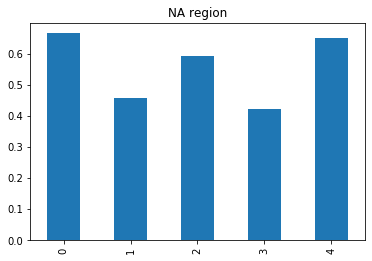

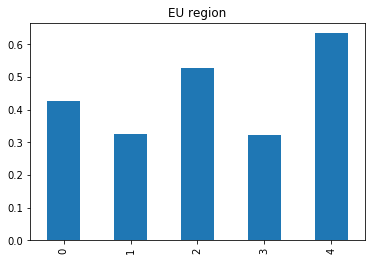

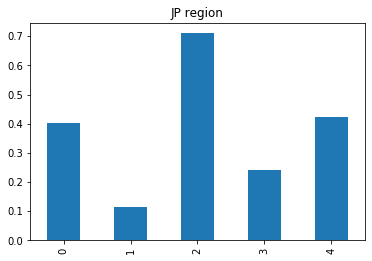

In [ ]:
#NA
platform_top5_na = platform_top5_na.head(5)
platform_top5_eu = platform_top5_eu.head(5)
platform_top5_jp = platform_top5_jp.head(5)

platform_top5_na.plot(kind='bar', y='percent_sales', title="NA region", legend=False)
platform_top5_eu.plot(kind='bar', y='percent_sales', title="EU region", legend=False)
platform_top5_jp.plot(kind='bar', y='percent_sales', title="JP region", legend=False)

2. Самые популярные жанры (топ-5). Поясним разницу.

Платформа - то на чем предпочитают играть пользователи, жанры - во что предпочитают играть пользователи.
Самый популярный жанр в Северной Америке и Европе - Action, в Японии - Role-Playing.

In [ ]:
genre_top5 = df_cut.groupby(by=["genre"])[['na_sales', 'eu_sales',
      'jp_sales', 'total_sales']].sum()
genre_top5_na = genre_top5.sort_values('na_sales', ascending=False).reset_index()
display(genre_top5_na.head(5)) # !! вся таблица

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,281.35,222.95,65.13,642.98
1,Shooter,221.23,155.55,12.98,441.52
2,Sports,149.27,104.83,14.59,304.90
3,Misc,123.04,65.43,23.25,231.96
4,Role-Playing,106.16,71.20,96.93,297.10


In [ ]:
genre_top5_eu = genre_top5.sort_values('eu_sales', ascending=False).reset_index()
display(genre_top5_eu.head(5)) # !! вся таблица

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,281.35,222.95,65.13,642.98
1,Shooter,221.23,155.55,12.98,441.52
2,Sports,149.27,104.83,14.59,304.90
3,Role-Playing,106.16,71.20,96.93,297.10
4,Misc,123.04,65.43,23.25,231.96


In [ ]:
genre_top5_jp = genre_top5.sort_values('jp_sales', ascending=False).reset_index()
display(genre_top5_jp.head(5)) # !! вся таблица

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Role-Playing,106.16,71.20,96.93,297.10
1,Action,281.35,222.95,65.13,642.98
2,Misc,123.04,65.43,23.25,231.96
3,Platform,53.61,36.91,15.70,116.49
4,Sports,149.27,104.83,14.59,304.90


3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
Влияет, например в Японии товар с рейтингом E10+ покупают реже, чем с рейтингом M. В Японии с рейтингом М покупают реже, чем в Европе и Америке.

In [ ]:

rating_ESRB = df_cut.groupby(by=["rating"])[['na_sales', 'eu_sales',
      'jp_sales', 'total_sales']].sum()

# na_sales
rating_ESRB = rating_ESRB.sort_values('na_sales', ascending=False).reset_index()
rating_ESRB['percent_sales'] = rating_ESRB['na_sales']/(rating_ESRB['na_sales']
                                                                  +rating_ESRB['eu_sales']+rating_ESRB['jp_sales'])
display(rating_ESRB) # !! вся таблица

#rating_ESRB = df_cut.query('rating == "esrb"')
#rating_ESRB

###rating_ESRB = df_cut.groupby(by=["rating"]).mean()
###rating_ESRB
rating_ESRB = df_cut.groupby(by=["rating"])[['na_sales', 'eu_sales',
      'jp_sales', 'total_sales']].sum()

# na_sales
rating_ESRB = rating_ESRB.sort_values('eu_sales', ascending=False).reset_index()
rating_ESRB['percent_sales'] = rating_ESRB['na_sales']/(rating_ESRB['na_sales']
                                                                  +rating_ESRB['eu_sales']+rating_ESRB['jp_sales'])
display(rating_ESRB) # !! вся таблица

#rating_ESRB = df_cut.query('rating == "esrb"')
#rating_ESRB

###rating_ESRB = df_cut.groupby(by=["rating"]).mean()
###rating_ESRB
rating_ESRB = df_cut.groupby(by=["rating"])[['na_sales', 'eu_sales',
      'jp_sales', 'total_sales']].sum()

# na_sales
rating_ESRB = rating_ESRB.sort_values('jp_sales', ascending=False).reset_index()
rating_ESRB['percent_sales'] = rating_ESRB['na_sales']/(rating_ESRB['na_sales']
                                                                  +rating_ESRB['eu_sales']+rating_ESRB['jp_sales'])
display(rating_ESRB) # !! вся таблица

,rating,na_sales,eu_sales,jp_sales,total_sales,percent_sales
0,M,366.55,275.50,29.25,763.34,0.546030
1,E,263.18,183.73,46.80,550.66,0.533066
2,E10+,155.57,95.47,12.77,293.90,0.589705
3,T,151.86,103.29,39.84,330.60,0.514797
4,,147.19,131.97,157.17,474.56,0.337336
5,EC,1.13,0.00,0.00,1.20,1.000000
6,RP,0.00,0.03,0.00,0.04,0.000000


,rating,na_sales,eu_sales,jp_sales,total_sales,percent_sales
0,M,366.55,275.50,29.25,763.34,0.546030
1,E,263.18,183.73,46.80,550.66,0.533066
2,,147.19,131.97,157.17,474.56,0.337336
3,T,151.86,103.29,39.84,330.60,0.514797
4,E10+,155.57,95.47,12.77,293.90,0.589705
5,RP,0.00,0.03,0.00,0.04,0.000000
6,EC,1.13,0.00,0.00,1.20,1.000000


,rating,na_sales,eu_sales,jp_sales,total_sales,percent_sales
0,,147.19,131.97,157.17,474.56,0.337336
1,E,263.18,183.73,46.80,550.66,0.533066
2,T,151.86,103.29,39.84,330.60,0.514797
3,M,366.55,275.50,29.25,763.34,0.546030
4,E10+,155.57,95.47,12.77,293.90,0.589705
5,EC,1.13,0.00,0.00,1.20,1.000000
6,RP,0.00,0.03,0.00,0.04,0.000000


**Шаг 6. Проведим исследование статистических показателей** <a id='link4'></a>

1. Исследование: Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построем гистограммы. Опишем распределения
2. Результат: По среднему:Критики высоко оценивают ролевые и спортивные игры, пользователи высоко оценивают ролевые и низко оценивают спортивные. По среднему: Критики высоко оценивают ролевые и спортивные игры, пользователи высоко оценивают ролевые и низко оценивают спортивные. По дисперсии и стандартному отклонению: У критиков и пользователей сильный разброс в оцеках шутеров и гонок, об этом говорит высокая дисперсия и стандартное отклонение.
3. Это говорит, что в средняя ролевая игра получается лучшего качества, чем средний шутер или гоночная игра.

Misc


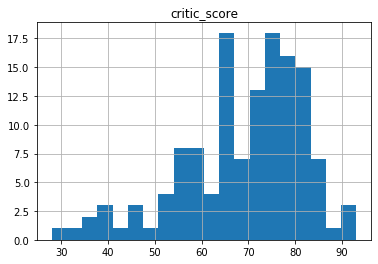

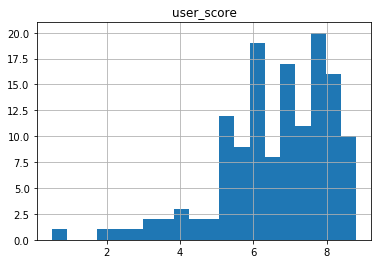

Action


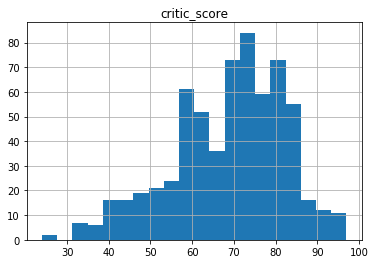

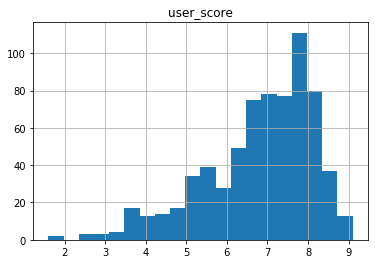

Role-Playing


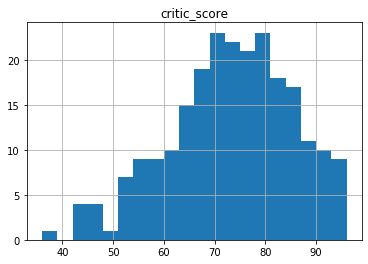

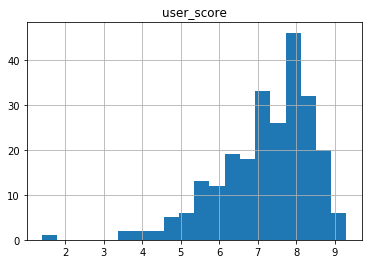

Shooter


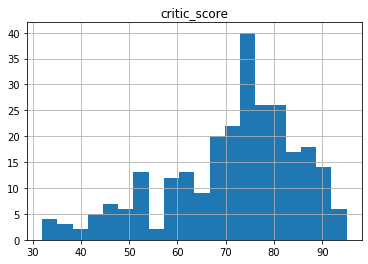

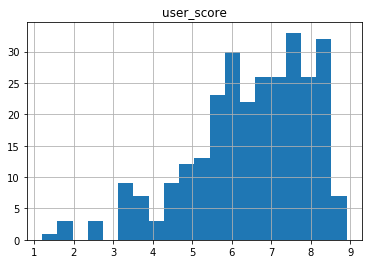

Racing


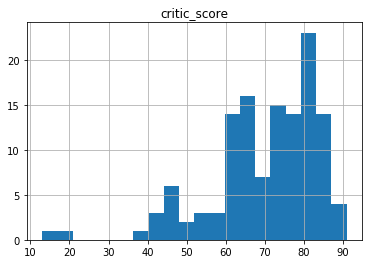

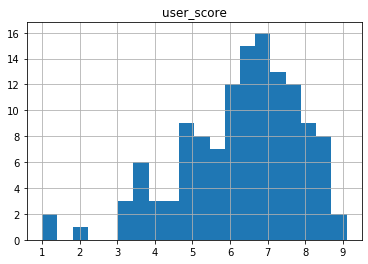

Platform


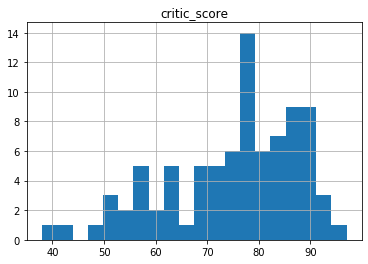

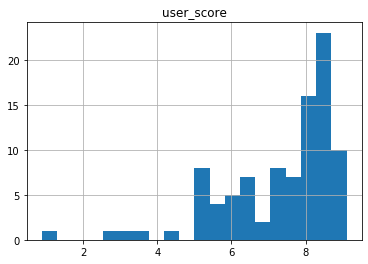

Simulation


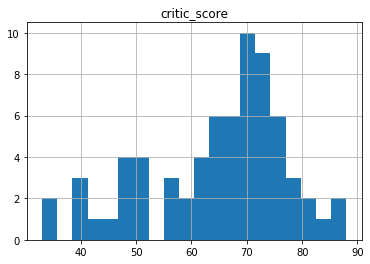

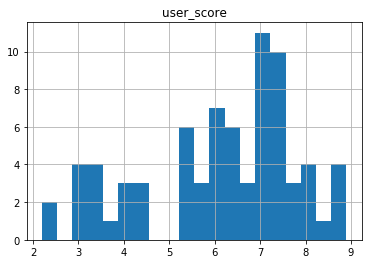

Sports


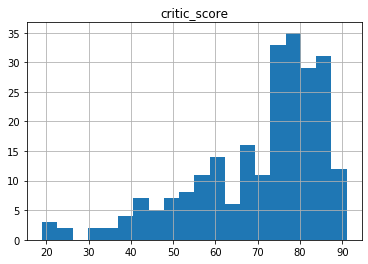

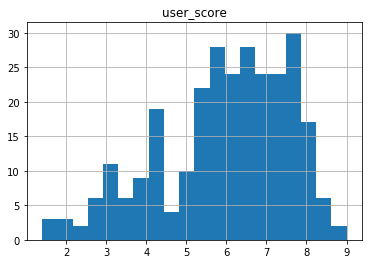

Fighting


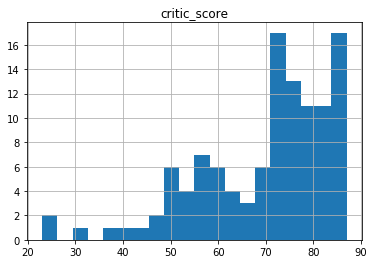

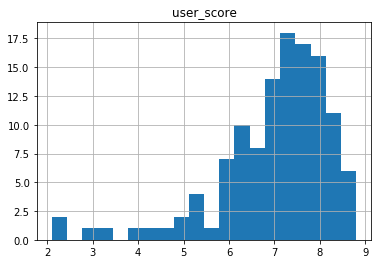

Strategy


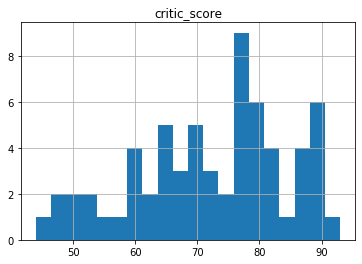

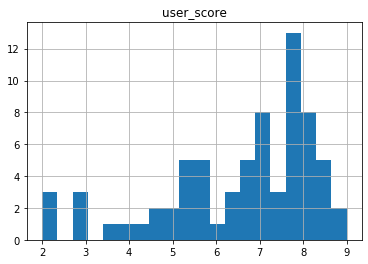

Adventure


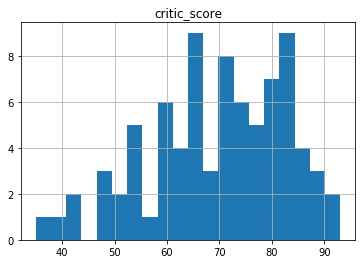

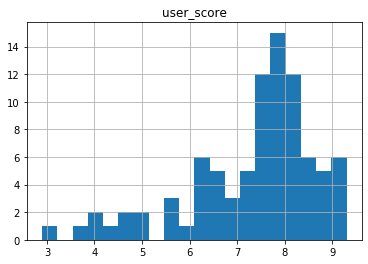

Puzzle


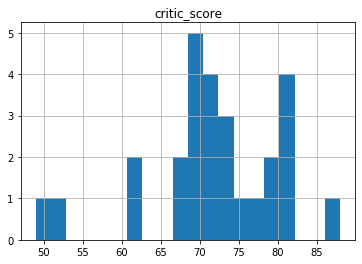

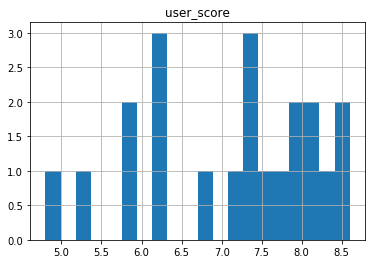

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4064,The Talos Principle,PS4,2015,Puzzle,0.00,0.02,0.00,0.00,88.0,8.4,E10+,0.02
3047,Bejeweled 3,PC,2010,Puzzle,0.02,0.05,0.00,0.01,82.0,8.1,E,0.08
455,Captain Toad: Treasure Tracker,WiiU,2014,Puzzle,0.53,0.38,0.19,0.09,81.0,8.6,E,1.19
723,Professor Layton and the Azran Legacy,3DS,2013,Puzzle,0.00,0.48,0.25,0.03,81.0,7.9,E10+,0.76
357,Super Scribblenauts,DS,2010,Puzzle,1.06,0.29,0.00,0.11,81.0,8.2,E10+,1.46
...,...,...,...,...,...,...,...,...,...,...,...,...
4659,Curse of the Amsterdam Diamond,DS,2012,Puzzle,0.00,0.01,0.00,0.00,NaN,NaN,,0.01
4737,Legends of Oz: Dorothy's Return,3DS,2014,Puzzle,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
4746,Balloon Pop 2,3DS,2012,Puzzle,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
4752,The Treasures of Mystery Island 3 Pack - Save ...,PC,2011,Puzzle,0.01,0.00,0.00,0.00,NaN,NaN,,0.01


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
455,Captain Toad: Treasure Tracker,WiiU,2014,Puzzle,0.53,0.38,0.19,0.09,81.0,8.6,E,1.19
680,Professor Layton vs Phoenix Wright: Ace Attorney,3DS,2012,Puzzle,0.20,0.26,0.30,0.04,79.0,8.5,T,0.80
4064,The Talos Principle,PS4,2015,Puzzle,0.00,0.02,0.00,0.00,88.0,8.4,E10+,0.02
357,Super Scribblenauts,DS,2010,Puzzle,1.06,0.29,0.00,0.11,81.0,8.2,E10+,1.46
3047,Bejeweled 3,PC,2010,Puzzle,0.02,0.05,0.00,0.01,82.0,8.1,E,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...
4659,Curse of the Amsterdam Diamond,DS,2012,Puzzle,0.00,0.01,0.00,0.00,NaN,NaN,,0.01
4737,Legends of Oz: Dorothy's Return,3DS,2014,Puzzle,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
4746,Balloon Pop 2,3DS,2012,Puzzle,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
4752,The Treasures of Mystery Island 3 Pack - Save ...,PC,2011,Puzzle,0.01,0.00,0.00,0.00,NaN,NaN,,0.01


In [ ]:
for elem in df_cut['genre'].unique():
    score_genre_mean = df_cut.query('genre == @elem')
    
    #score_genre_mean = df_cut1.groupby(by=["genre"])[['critic_score', 'user_score']]
    print(elem)
    score_genre_mean.hist('critic_score', bins=20, )
    plt.show()
    score_genre_mean.hist('user_score', bins=20,)
    plt.show()


display(score_genre_mean.sort_values('critic_score', ascending=False))
score_genre_mean.sort_values('user_score', ascending=False)

дисперсия

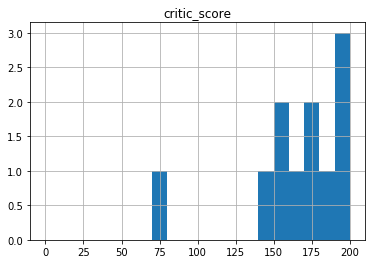

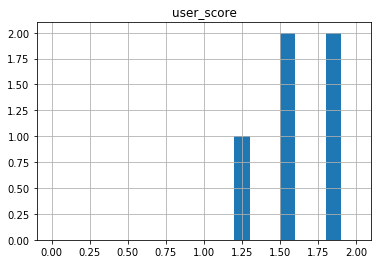

,critic_score,user_score
genre,,
Sports,242.282328,2.639929
Fighting,196.893173,1.572320
Shooter,193.179731,2.326306
Racing,192.689664,2.423092
Action,187.515850,1.811515
Adventure,179.477778,1.847503
Platform,171.839124,2.401695
Misc,167.491022,2.304334
Simulation,159.151321,2.902497


,critic_score,user_score
genre,,
Strategy,152.277530,3.132221
Simulation,159.151321,2.902497
Sports,242.282328,2.639929
Racing,192.689664,2.423092
Platform,171.839124,2.401695
Shooter,193.179731,2.326306
Misc,167.491022,2.304334
Adventure,179.477778,1.847503
Action,187.515850,1.811515


In [ ]:
score_genre_var = df_cut.groupby(by=["genre"])[['critic_score', 'user_score']].var()
score_genre_var.hist('critic_score', bins=20, range=(0, 200))
plt.show()
score_genre_var.hist('user_score', bins=20, range=(0, 2))
plt.show()
display(score_genre_var.sort_values('critic_score', ascending=False))
score_genre_var.sort_values('user_score', ascending=False)

стандартное отклонение

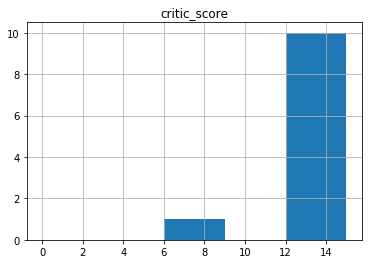

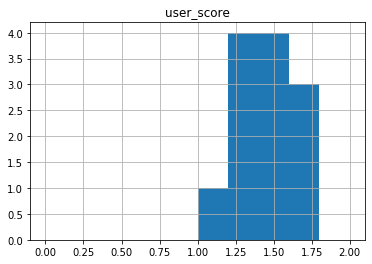

,critic_score,user_score
genre,,
Sports,15.565421,1.624786
Fighting,14.031863,1.253922
Shooter,13.898911,1.525223
Racing,13.881270,1.556629
Action,13.693643,1.345925
Adventure,13.396932,1.359229
Platform,13.108742,1.549740
Misc,12.941832,1.518003
Simulation,12.615519,1.703672


,critic_score,user_score
genre,,
Strategy,12.340078,1.769808
Simulation,12.615519,1.703672
Sports,15.565421,1.624786
Racing,13.881270,1.556629
Platform,13.108742,1.549740
Shooter,13.898911,1.525223
Misc,12.941832,1.518003
Adventure,13.396932,1.359229
Action,13.693643,1.345925


In [ ]:
score_genre_std = df_cut.groupby(by=["genre"])[['critic_score', 'user_score']].std()
score_genre_std.hist('critic_score', bins=5, range=(0, 15))
plt.show()
score_genre_std.hist('user_score', bins=10, range=(0, 2))
plt.show()
display(score_genre_std.sort_values('critic_score', ascending=False))
score_genre_std.sort_values('user_score', ascending=False)

описание

In [ ]:
score_genre_mean = df_cut.groupby(by=["genre"])[['critic_score', 'user_score']].describe()
score_genre_mean

critic_score                                                  \
                    count       mean        std   min    25%   50%    75%   
genre                                                                       
Action              643.0  68.754277  13.693643  24.0  59.50  71.0  79.00   
Adventure            81.0  69.481481  13.396932  35.0  60.00  71.0  81.00   
Fighting            113.0  69.734513  14.031863  23.0  61.00  74.0  80.00   
Misc                134.0  68.858209  12.941832  28.0  62.25  72.5  77.75   
Platform             86.0  75.139535  13.108742  38.0  68.00  78.0  85.75   
Puzzle               27.0  71.740741   8.799443  49.0  69.00  71.0  78.00   
Racing              127.0  70.267717  13.881270  13.0  62.50  73.0  81.00   
Role-Playing        233.0  72.772532  12.197185  36.0  65.00  74.0  82.00   
Shooter             265.0  71.298113  13.898911  32.0  63.00  74.0  81.00   
Simulation           69.0  64.768116  12.615519  33.0  57.00  68.0  73.00   
Sports              238.0  70.205882  15.565421  19.0  60.25  75.0  82.00   
Strategy             64.0  72.234375  12.340078  44.0  64.75  75.0  80.25   

                   user_score                                               \
               max      count      mean       std  min    25%   50%    75%   
genre                                                                        
Action        97.0      694.0  6.799424  1.345925  1.6  6.025  7.10  7.800   
Adventure     93.0       88.0  7.309091  1.359229  2.9  6.600  7.65  8.200   
Fighting      87.0      121.0  6.979339  1.253922  2.1  6.400  7.30  7.800   
Misc          93.0      137.0  6.608759  1.518003  0.5  5.800  6.80  7.800   
Platform      97.0       95.0  7.285263  1.549740  0.9  6.450  7.90  8.400   
Puzzle        88.0       21.0  7.114286  1.100584  4.8  6.300  7.40  7.900   
Racing        91.0      129.0  6.283721  1.556629  1.0  5.400  6.50  7.200   
Role-Playing  96.0      243.0  7.246502  1.231348  1.4  6.500  7.50  8.100   
Shooter       95.0      285.0  6.472281  1.525223  1.2  5.700  6.70  7.700   
Simulation    88.0       75.0  6.144000  1.703672  2.2  5.300  6.40  7.350   
Sports        91.0      278.0  5.964029  1.624786  1.4  5.100  6.20  7.275   
Strategy      93.0       71.0  6.532394  1.769808  2.0  5.450  7.00  7.900   

                   
              max  
genre              
Action        9.1  
Adventure     9.3  
Fighting      8.8  
Misc          8.8  
Platform      9.1  
Puzzle        8.6  
Racing        9.1  
Role-Playing  9.3  
Shooter       8.9  
Simulation    8.9  
Sports        9.0  
Strategy      9.0

Перекос в оценках связан с тем, пользователи и критики часто завышают оценки. Среднее значение и медиана около 7 баллов.

**Шаг 7. Проверим гипотезы** <a id='link5'></a>

1. Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.
2. Альтернативную гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.
3. Ответ: Нулевая гипотеза скорее всего не верна, это также показывают среднии значения по всей БД (Xbox One и PC).
4. Нулевая гипотеза - гипотеза на равенство, просто гипотеза о равенстве средних двух генеральных совокупностей. Применил критерий о равенстве средних двух генеральных совокупностей, потому что именно это и спрашивалось в проверке гипотезы.

In [ ]:
from scipy import stats as st
import numpy as np
df_cut = df_cut.dropna().reset_index(drop=True)

temp = df_cut.query('platform == "XOne"')
pl_XOne = temp['user_score']
temp = df_cut.query('platform == "PC"')
pl_PC = temp['user_score']
pl_XOne.reset_index(drop=True, inplace=True)
pl_PC.reset_index(drop=True, inplace=True)
alpha = .05# критический уровень статистической значимости

results = st.ttest_ind(pl_XOne, pl_PC, equal_var =True) # гипотеза о равенстве средних двух независимых совокупностей
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Среднее по Xbox One", pl_XOne.mean())
print("Среднее по PC", pl_PC.mean())

p-значение: 0.6052999330360087
Не получилось отвергнуть нулевую гипотезу
Среднее по Xbox One 6.471962616822431
Среднее по PC 6.557095709570957


Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
1. Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.
2. Альтернативную гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.
3. Ответ: Нулевая гипотеза скорее всего не верна. Cреднии значения не равны по всей БД (Action и Sports).
4. Нулевая гипотеза - гипотеза на равенство, Применил критерий о равенстве средних двух генеральных совокупностей, потому что именно это и спрашивалось в проверке гипотезы.

In [ ]:
temp = df_cut.query('genre == "Action"')
pl_Action = temp['user_score']
temp = df_cut.query('genre == "Sports"')
pl_Sports = temp['user_score']
pl_Action.reset_index(drop=True, inplace=True)
pl_Sports.reset_index(drop=True, inplace=True)
alpha = .05# критический уровень статистической значимости

results = st.ttest_ind(pl_Action, pl_Sports, equal_var = True) # гипотеза о равенстве средних двух независимых совокупностей
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

print("Среднее по Action", pl_Action.mean())
print("Среднее по Sports", pl_Sports.mean())

p-значение: 6.742890819076265e-10
Отвергаем нулевую гипотезу
Среднее по Action 6.847689768976899
Среднее по Sports 6.186574074074075


## Шаг 8. Результаты исследования <a id='link6'></a>

Гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC равны.

* Средние пользовательские рейтинги жанров Action и Sports разные;

**Общие результаты**

PS4 и PC - потенциально прибыльнаые платформы. При выпуске игры на PC и PS4 основная доля приходится на PS4. Аудитория PS4 много больше рынка PC. Продажи значительно сильнее зависят от отзывов критиков, чем от отзывов пользователей. Самые прибыльные жанры: Shooter и Platform. Самый популярный жанр в Северной Америке и Европе - Action, в Японии - Role-Playing. Рейтинг ESRB не влияет на продажи. Критики и пользователи высоко оценивают ролевые, у шутеров и гонок преобладают смешанные отзывы. Средние пользовательские рейтинги платформ Xbox One и PC не равны. Средние пользовательские рейтинги жанров Action и Sports одинаковы.

В результате ни одна из гипотез не подтверждена.